In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sn
import yfinance as yf

In [6]:
# S - 1 - fetch data of last 3 years
apple=  yf.download(tickers='AAPL',start='2021-07-19',end='2024-07-19')
tesla = yf.download(tickers='TSLA',start='2021-07-19',end='2024-07-19')

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [12]:
# S - 2 Describe
apple['Close'].describe()



count    755.000000
mean     166.551232
std       20.007323
min      125.019997
25%      149.464996
50%      167.229996
75%      179.455002
max      234.820007
Name: Close, dtype: float64

In [13]:
tesla['Close'].describe()

count    755.000000
mean     239.273073
std       59.473147
min      108.099998
25%      190.195000
50%      237.919998
75%      274.116669
max      409.970001
Name: Close, dtype: float64

In [ ]:
# S - 3 Compare with TradingView

In [22]:
pct_apple = apple['Close'].pct_change()
pct_tesla = tesla['Close'].pct_change()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Count'>

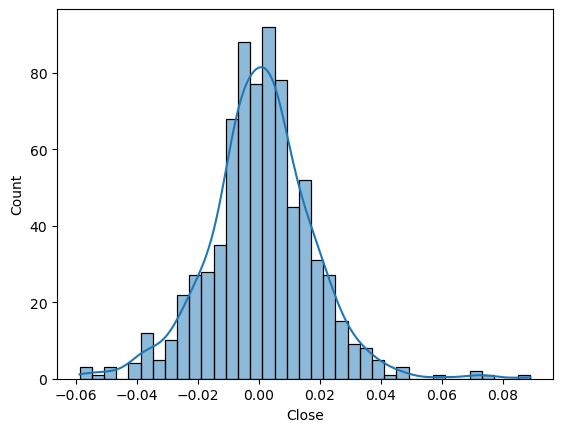

In [24]:
sn.histplot(pct_apple,kde=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Count'>

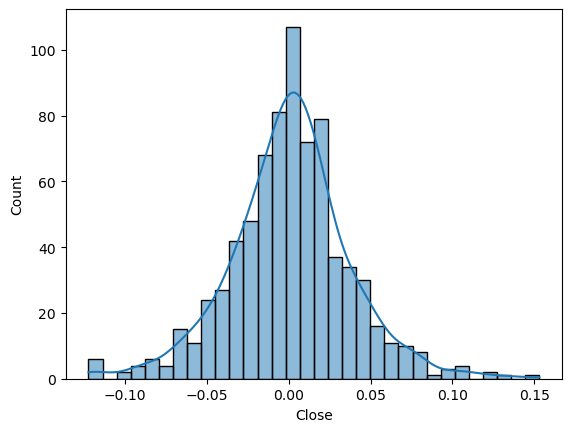

In [25]:
sn.histplot(pct_tesla,kde=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Count'>

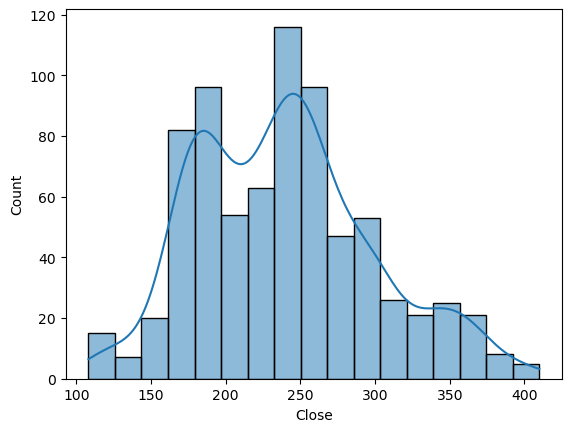

In [20]:
# S - 4 Draw histogram with close price and close price pct sn.histplot
sn.histplot(tesla['Close'])

In [27]:
# S -5 - Find the CDF normal distribution

pct_apple.describe()

count    754.000000
mean       0.000750
std        0.017268
min       -0.058680
25%       -0.008429
50%        0.000776
75%        0.009983
max        0.088975
Name: Close, dtype: float64

In [28]:
pct_tesla.describe()

count    754.000000
mean       0.000866
std        0.036682
min       -0.122422
25%       -0.019141
50%        0.001642
75%        0.020187
max        0.153069
Name: Close, dtype: float64

In [46]:
cdf_apple = norm.cdf(pct_apple,loc=0.000750,scale=0.017268)
cdf_tesla = norm.cdf(pct_tesla,loc=0.000866,scale=0.036682)

In [44]:
# S - 6  - Find the CDF standard normal distribution

z_apple= (pct_apple - pct_apple.mean())/pct_apple.std()
z_tesla = (pct_tesla - pct_tesla.mean())/pct_tesla.std()

In [47]:
scdf_apple = norm.cdf(z_apple)
scdf_tesla = norm.cdf(z_tesla)

In [50]:
pd.Series(cdf_apple)

0           NaN
1      0.927956
2      0.366697
3      0.696433
4      0.742432
         ...   
750    0.761876
751    0.822824
752    0.524056
753    0.065734
754    0.108859
Length: 755, dtype: float64

In [54]:
sd_apple = pd.Series(scdf_apple)

In [52]:
pd.Series(cdf_tesla)

0           NaN
1      0.718640
2      0.405690
3      0.391863
4      0.393388
         ...   
750    0.785451
751    0.677497
752    0.655194
753    0.189419
754    0.522518
Length: 755, dtype: float64

In [55]:
sd_tesla = pd.Series(scdf_tesla)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Count'>

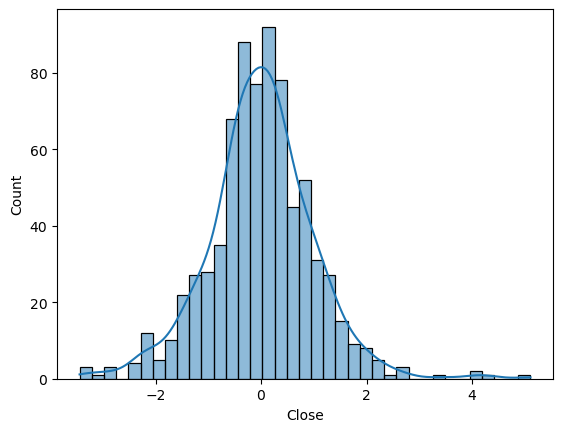

In [66]:
sn.histplot(z_apple,kde=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Count'>

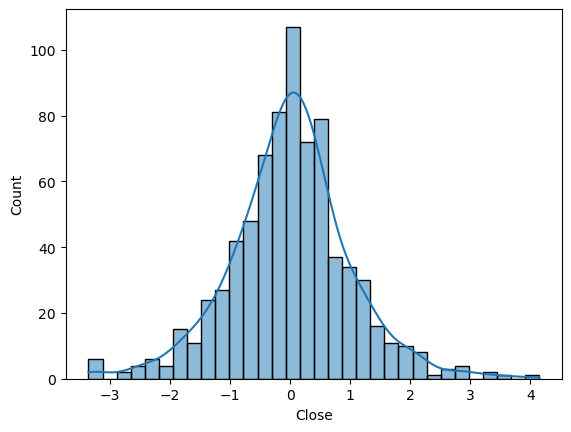

In [67]:
sn.histplot(z_tesla,kde=True)